In [706]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [707]:
X, y = load_wine(return_X_y=True, as_frame=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [708]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [710]:
# Split samples into respective classes
class_0 = X_train.loc[y_train==0]
class_1 = X_train.loc[y_train==1]
class_2 = X_train.loc[y_train==2]

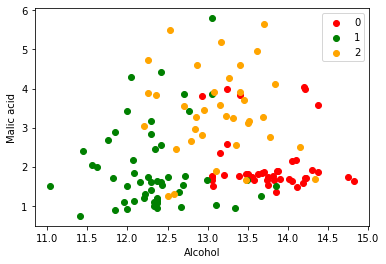

In [711]:
figure, axes = plt.subplots()
axes.scatter(class_0.iloc[:,0], class_0.iloc[:,1], label="0", color="red")
axes.scatter(class_1.iloc[:,0], class_1.iloc[:,1], label="1", color="green")
axes.scatter(class_2.iloc[:,0], class_2.iloc[:,1], label="2", color="orange")
axes.set_xlabel("Alcohol")
axes.set_ylabel("Malic acid")
axes.legend()

In [712]:
knn3 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn3.fit(X_train, y_train)
knn5 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn5.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [713]:
knn3_train_score = knn3.score(X_train, y_train)
knn3_test_score = knn3.score(X_test, y_test)

knn5_train_score = knn5.score(X_train, y_train)
knn5_test_score = knn5.score(X_test, y_test)

print(f"""K-3 Train score: {knn3_train_score}, Test score: {knn3_test_score}

K-5 Train score: {knn5_train_score}, Test score: {knn5_test_score}""")

K-3 Train score: 0.8721804511278195, Test score: 0.7111111111111111

K-5 Train score: 0.8045112781954887, Test score: 0.6444444444444445


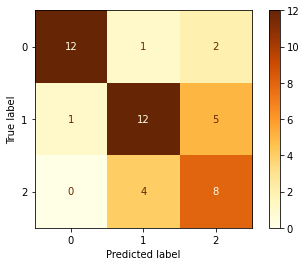

In [714]:
plot_confusion_matrix(knn3, X_test, y_test, cmap="YlOrBr")

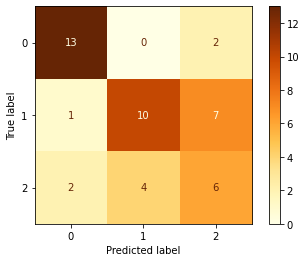

In [715]:
plot_confusion_matrix(knn5, X_test, y_test, cmap="YlOrBr")

### Generally, it seems that K = 3 is more accurate on this dataset (testing accuracy), but results vary slightly with different runs (likely because of the random sampling of train_test_split).